**Exemplo 9.16**

D | A | E | 0
-- | -- | -- | --
24.9 | 27.9 | 38.4 | 23.8
20.4 | 28.1 | 38.6 | 25.3
24.2 | 28.4 | 41.2 | 23.5
22.3 | 25.3 | 43.9 | 27.6
20.3 | 29.3 | 40.2 | 25.5
24 | 28.5 | 40.2 | 23.9
23.5 | 27.9 | 37.3 | 22.6


In [ ]:
import numpy as np

d = np.array([24.9, 20.4, 24.2, 22.3, 20.3, 24, 23.5])
a = np.array([27.9, 28.1, 28.4, 25.3, 29.3, 28.5, 27.9])
e = np.array([38.4, 38.6, 41.2, 43.9, 40.2, 40.2, 37.3])
o = np.array([23.8, 25.3, 23.5, 27.6, 25.5, 23.9, 22.6])

y_bar_1 = d.mean()
y_bar_2 = a.mean()
y_bar_3 = e.mean()
y_bar_4 = o.mean()

print("Y1:", y_bar_1)
print("Y2:", y_bar_2)
print("Y3:", y_bar_3)
print("Y4:", y_bar_4)

Y1: 22.8
Y2: 27.914285714285715
Y3: 39.971428571428575
Y4: 24.599999999999998


([<matplotlib.axis.XTick at 0x7f85e8c792d0>,
 [Text(0, 0, 'D'), Text(0, 0, 'A'), Text(0, 0, 'E'), Text(0, 0, 'O')])

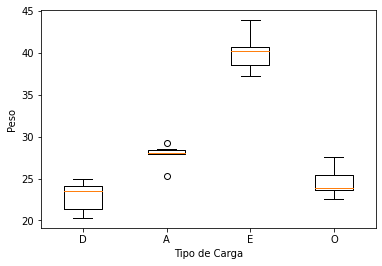

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot([d, a, e, o])
plt.xlabel('Tipo de Carga')
plt.ylabel('Peso')

plt.xticks([1, 2, 3, 4], ['D', 'A', 'E', 'O'])

Somar todos os elementos elevados ao quadrado

$\sum_{i=1}^{4}\sum_{j=1}^{7} Y_{ij}^2$

Soma das médias ao quadrado

$\sum_{i=1}^{4} \bar{Y}_i^2$

In [ ]:
Y_ij_2 = (np.concatenate([d, a, e, o])**2).sum()
print('Yij2:', Y_ij_2)

Y_bar_2 = (np.array([y_bar_1, y_bar_2, y_bar_3, y_bar_4])**2).sum()
print('Y_bar_2:', Y_bar_2)

Yij2: 24588.559999999998
Y_bar_2: 3501.9224489795924


_Somas de Quadrados_

$ SQD = \sum_{i=1}^K\sum_{j=1}^m(Y_{ij}-\hat{\mu}_i)^2 = \sum_{i=1}^K\sum_{j=1}^m(Y_{ij}-\bar{Y}_i)^2 = \sum_{i=1}^K\sum_{j=1}^mY_{ij}^2-m\sum_{i=1}^K\bar{Y}_i^2 $

$ SQE = m\sum_{i=1}^K(\bar{Y}_{i}-\bar{Y})^2 = m(\sum_{i=1}^K\bar{Y}^2_{i}-K\bar{Y}^2) $

$ SQT = \sum_{i=1}^K\sum_{j=1}^m(Y_{ij}-\hat{\mu})^2 = \sum_{i=1}^K\sum_{j=1}^m(Y_{ij}-\bar{Y})^2 = \sum_{i=1}^K\sum_{j=1}^mY_{ij}^2-mK\bar{Y}^2 $

In [ ]:
m = 7
k = 4
Y_bar = np.concatenate([d, a, e, o]).mean()

SQD = Y_ij_2-m*Y_bar_2
SQE = m*(Y_bar_2-k*(Y_bar**2))
SQT = Y_ij_2-m*k*(Y_bar**2)

print('SQD:', SQD)
print('SQE:', SQE)
print('SQT:', SQT)

SQD: 75.10285714285055
SQE: 1254.5642857142875
SQT: 1329.667142857139


In [ ]:
SQD+SQE

1329.667142857138

In [ ]:
QME = SQE/(k-1)
QMD = SQD/(k*(m-1))

f_obs = QME/QMD

print('QMD:', QMD)
print('QME:', QME)
print('f_obs:', f_obs)

QMD: 3.1292857142854396
QME: 418.18809523809585
f_obs: 133.63691699004465


In [ ]:
from scipy import stats

fdist = stats.f(3, 24)

In [ ]:
fc = fdist.ppf(0.95)
print('f_calc:', fc)

f_calc: 3.0087865704473615


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

In [ ]:
df = pd.DataFrame([d, a, e, o],
             index=['d', 'a', 'e', 'o']).T.stack().reset_index().drop('level_0', axis=1)
df.columns = ['Tipo_Carga', 'Peso']

df.head()

,Tipo_Carga,Peso
0,d,24.9
1,a,27.9
2,e,38.4
3,o,23.8
4,d,20.4


In [ ]:
# https://www.statsmodels.org/stable/anova.html
cargas_lm = ols('Peso ~ Tipo_Carga',
                data=df).fit()

In [ ]:
table = sm.stats.anova_lm(cargas_lm, typ=2) # Type 2 Anova DataFrame
print(table)

                 sum_sq    df           F        PR(>F)
Tipo_Carga  1254.564286   3.0  133.636917  4.136050e-15
Residual      75.102857  24.0         NaN           NaN


In [ ]:
pvalor = 1-fdist.cdf(f_obs)
print('p-valor:', pvalor)

p-valor: 4.107825191113079e-15
